In [1]:
from graph_tool import Graph
from graph_tool.draw import graph_draw

KeyboardInterrupt: 

In [2]:
graph = Graph()

In [3]:
n = 10
m = 2
graph.add_vertex(n=n)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7f17f7957200>

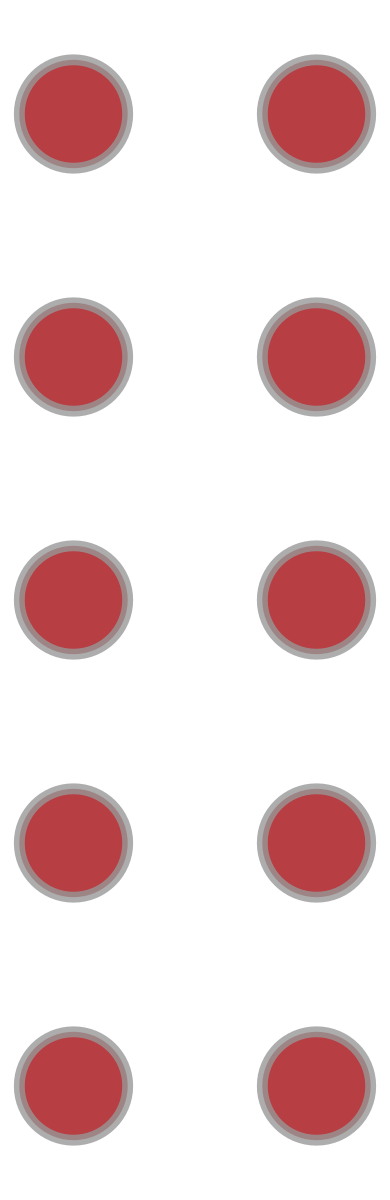

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f18867596a0, at 0x7f17f79698b0>

In [4]:
pos = graph.new_vertex_property(value_type="vector<float>")
id = graph.new_vertex_property(value_type="int")
block_counts = graph.new_vertex_property(value_type="vector<int>")
for v in range(0,n):
    vertex = graph.vertex(v)
    x = v % m
    y = v // m
    if ( (y+1) * m >= n):
        disp = ((y+1) * m - n) / 2
        x += disp
    pos[vertex] = [x, y]
    id[vertex] = v + 1

    count = [0 for i in range(0, n)]
    count[v] += 1
    block_counts[vertex] = count

graph_draw(graph, pos=pos)

In [5]:
from graph_tool.inference import minimize_blockmodel_dl

In [6]:
partition = minimize_blockmodel_dl(graph, B_min=n, B_max=n)

In [8]:
output = None
#output = "~/Jormungandr/nips/img/" + str(n) + "-vertical-legend.png"
partition.draw(pos=pos, output=output, vertex_shape="pie", vertex_pie_fractions=block_counts, vprops={"text":id})

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f18867596a0, at 0x7f18867593a0>

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 22})

(-3.0, 3.0)

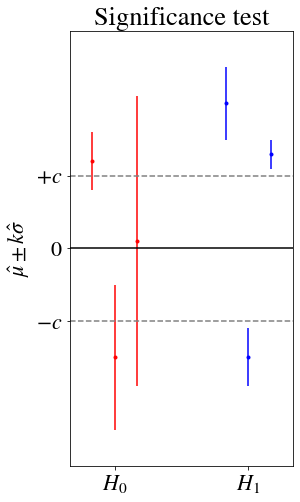

In [42]:
plt.figure(figsize=(4,8))
null_space=1

#rejected
plt.errorbar(0.1, 1.2, yerr=0.4, fmt=".", color="red")
plt.errorbar(0.2, -1.5, yerr=1, fmt=".", color="red")
plt.errorbar(0.3, 0.1, yerr=2, fmt=".", color="red")

#accepted
plt.errorbar(0.7, 2, yerr=0.5, fmt='.', color="blue")
plt.errorbar(0.8, -1.5, yerr=0.4, fmt='.', color="blue")
plt.errorbar(0.9, 1.3, yerr=0.2, fmt='.', color="blue")


plt.title("Significance test")
plt.hlines(abs(null_space), xmin=0, xmax=1, linestyle="--", color="gray")
plt.hlines(0, xmin=0, xmax=1, linestyle="-", color="black")
plt.hlines(-abs(null_space), xmin=0, xmax=1, linestyle="--", color="gray")
plt.xticks([0.2, 0.8], labels=[r"$H_0$",r"$H_1$"])
plt.yticks([-1, 0, 1], labels=["$-c$", "$0$", "$+c$"])
plt.ylabel(r"$\hat{\mu} \pm k \hat{\sigma}$")
plt.xlim(0,1)
plt.ylim(-3, 3)